# Using CMFGEN synthetic spectra

In [1]:
import VPtools as vp
import matplotlib.pyplot as plt

path_google = '/Users/vpetit/Library/CloudStorage/GoogleDrive-vpetit@udel.edu/Shared drives/'

## 1. How to access the synthetic spectra

The synthetic spectra can be downloaded from the Pollux database: https://pollux.oreme.org/collections/

These are non-LTE models with winds. 
:::{warning}
These models include wind lines -- therefore doing a rotation convolution will not be acurate for these lines, and for absorption lines that might be close the them. 
:::

ADD LINK TO PAPERS

We have a copy of these grids on the  ResearchGroupResources Google Drive at ReferenceMaterial/CMFGEN
* CMFGEN (we call it the CMFGEN-OB on the drive)

There are also other grids available for SMC and LMC metallicities on the Pollux database


We have a csv table on the google drive, that lists all of the models available

In [2]:
table = vp.cmfgen.get_table_galOB()
display(table)

,Root,Teff,log(g),Z,t,a,c,n,o,Mdot,vinfty,beta,finfty,vcl
0,C_s12020g2.30z-0.01t5.0_a0.00c-0.26n0.59o0.00_...,12020,2.30,-0.01,5,0,-0.26,0.59,0.00,-7.39,975,1.0,1.0,0
1,C_s12050g2.18z-0.01t5.0_a0.00c-0.08n0.23o0.02_...,12050,2.18,-0.01,5,0,-0.08,0.23,0.02,-7.55,948,1.0,0.1,30
2,C_s12540g2.24z-0.01t5.0_a0.00c-0.02n1.14o0.02_...,12540,2.24,-0.01,5,0,-0.02,1.14,0.02,-7.30,981,1.0,0.1,30
3,C_s12790g2.15z0.00t5.0_a0.00c-0.30n0.65o-0.04_...,12790,2.15,0.00,5,0,-0.30,0.65,-0.04,-6.68,910,1.0,1.0,0
4,C_s13960g2.32z0.00t5.0_a0.00c-0.30n0.65o-0.04_...,13960,2.32,0.00,5,0,-0.30,0.65,-0.04,-6.76,1014,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,C_s57477g4.16z-0.42t10.0_a0.00c0.03n0.08o0.03_...,57477,4.16,-0.42,10,0,0.03,0.08,0.03,-4.71,3500,1.0,0.1,100
305,C_s58057g4.41z-1.48t10.0_a0.00c-0.01n-0.01o-0....,58057,4.41,-1.48,10,0,-0.01,-0.01,-0.01,-7.22,5000,1.0,0.1,100
306,C_s59406g4.28z-0.73t10.0_a0.00c0.02n0.02o0.02_...,59406,4.28,-0.73,10,0,0.02,0.02,0.02,-5.97,5220,1.0,0.1,100
307,C_s60690g4.41z-1.48t10.0_a0.00c-0.01n-0.01o-0....,60690,4.41,-1.48,10,0,-0.01,-0.01,-0.01,-6.99,5212,1.0,0.1,100


The column "Root" gives the root of the filenames. There are three possible files available:
* IR
* VIS
* UV
that corresponds to their respective wavelength ranges. 

The file paths and names might be a bit difficult to remember (especially since values like the mass-loss rate are given with 3 significant digits), so we have a template path/name that we can access in the module:


In [3]:
print(vp.cmfgen.galOB_path_name)

ResearchGroupResources-Files/ReferenceMaterial/CMFGEN/CMFGEN-OB/{}_{}.spec


and you can use the `format` function to add the root and the wavlength range that you would like to use. 

For example, I would like the models that have a temperature and log(g) that are the closest to 23000K and 4.0. 

In [4]:
diff = (table['Teff'] - 23000).abs()
display(table[diff == diff.min()])

,Root,Teff,log(g),Z,t,a,c,n,o,Mdot,vinfty,beta,finfty,vcl
45,C_s23000g3.33z-0.01t5.0_a0.00c0.01n0.07o0.02_M...,23000,3.33,-0.01,5,0,0.01,0.07,0.02,-8.65,1900,1.0,0.1,30
46,C_s23000g3.80z-0.01t10.0_a0.00c-0.03n0.01o-0.0...,23000,3.80,-0.01,10,0,-0.03,0.01,-0.02,-9.00,1699,1.0,0.1,100
47,C_s23000g4.00z-0.01t10.0_a0.00c-0.03n0.01o-0.0...,23000,4.00,-0.01,10,0,-0.03,0.01,-0.02,-9.00,2145,1.0,0.1,100
48,C_s23000g4.20z-0.01t10.0_a0.00c-0.03n0.01o-0.0...,23000,4.20,-0.01,10,0,-0.03,0.01,-0.02,-9.00,2704,1.0,0.1,100
49,C_s23000g4.30z-0.01t10.0_a0.00c-0.03n0.01o-0.0...,23000,4.30,-0.01,10,0,-0.03,0.01,-0.02,-9.00,3037,1.0,0.1,100


Look like the row I want is the row #47, so I can get the root name for the file

In [5]:
root = table.loc[47,"Root"]

my_model_name = vp.cmfgen.galOB_path_name.format(root,'VIS')
print(my_model_name)

ResearchGroupResources-Files/ReferenceMaterial/CMFGEN/CMFGEN-OB/C_s23000g4.00z-0.01t10.0_a0.00c-0.03n0.01o-0.02_Mdot-9.00Vinfty2145beta1.0finfty0.1vcl100_VIS.spec


## 2. How to read in a synthetic spectrum

We can read in one of the synthetic spectrum using the `read` function in the `cmfgen` module.

In [6]:
spec, spec_norm = vp.cmfgen.read(path_google+my_model_name)

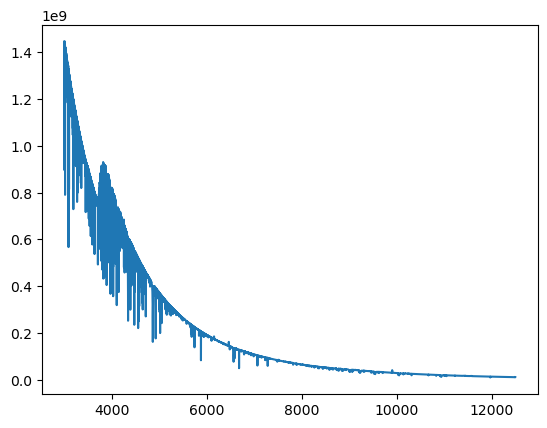

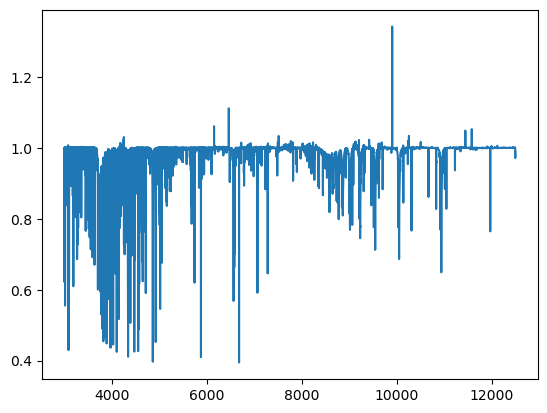

In [7]:
fig, ax = plt.subplots(1,1)
ax.plot(spec.wl, spec.specI)

fig, ax = plt.subplots(1,1)
ax.plot(spec_norm.wl, spec_norm.specI)